In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
df=datasets.load_diabetes(scaled=False)
x=df.data
y=df.target

In [3]:
data=pd.DataFrame(x,columns=df.feature_names)
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [5]:
data.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [6]:
data.duplicated().sum()

0

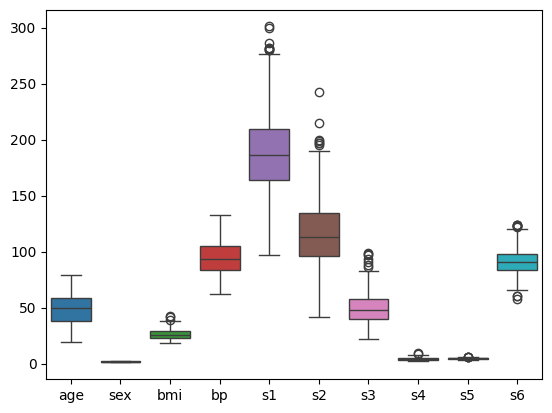

In [7]:
sns.boxplot(data)
plt.show()

In [23]:
threshold = 3
data_replaced_outliers = data.copy()
for i in range(data.shape[1]):
    feature_data = data.iloc[:, i]
    z_scores = (feature_data - np.mean(feature_data)) / np.std(feature_data)
    feature_outliers = z_scores[np.abs(z_scores) > threshold].index.tolist()
    mean_value = np.mean(feature_data)
    data_replaced_outliers.iloc[feature_outliers, i] = mean_value
# print("Data with outliers replaced:\n", data_replaced_outliers)

In [26]:
data.shape[1]

10

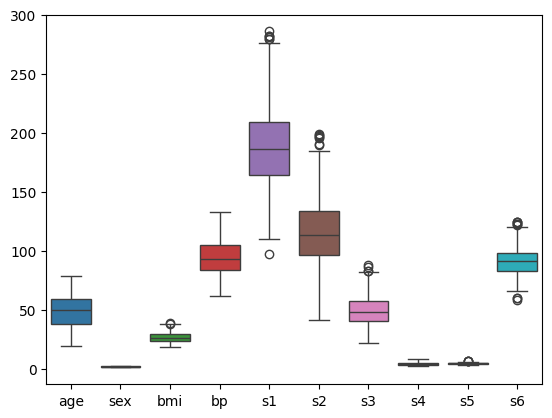

In [9]:
sns.boxplot(data_replaced_outliers)
plt.show()

In [21]:
threshold = 3
all_outliers = set()
for i in range(data.shape[1]):
    feature_data = data.iloc[:, i]
    z_scores = (feature_data - np.mean(feature_data)) / np.std(feature_data)
    feature_outliers = z_scores[np.abs(z_scores) > threshold].index.tolist()
    all_outliers.update(feature_outliers)
all_outliers = list(all_outliers)
data_dropped_outliers = data.drop(all_outliers, axis=0)
# print("Data with outliers removed:\n", data_dropped_outliers)

<Axes: >

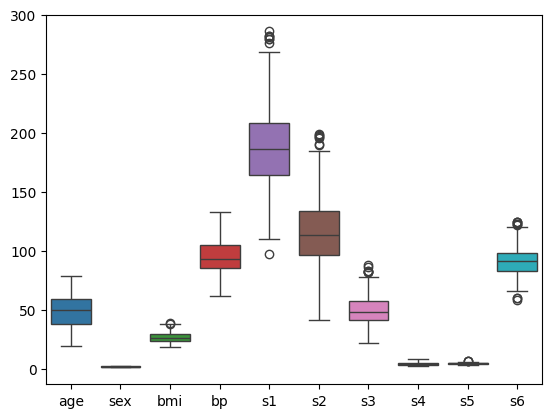

In [11]:
sns.boxplot(data_dropped_outliers)

In [12]:
# data.clip(data.quantile(0.2),data.quantile(0.8),inplace=True,axis=1)

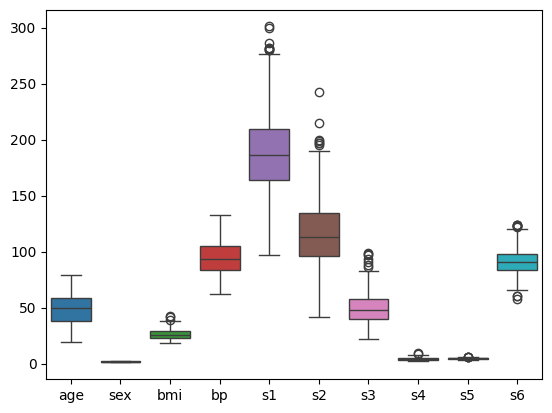

In [13]:
sns.boxplot(data)
plt.show()

In [14]:
all_outliers

[256, 322, 260, 261, 230, 269, 367, 336, 216, 441, 58, 123]

In [15]:
data[256:257]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
256,35.0,1.0,41.3,81.0,168.0,102.8,37.0,5.0,4.9488,94.0


In [16]:
data_replaced_outliers[256:257]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
256,35.0,1.0,26.375792,81.0,168.0,102.8,37.0,5.0,4.9488,94.0


In [17]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


In [29]:
data_rep_outliers = data.copy()
for i in range(data.shape[1]):
    feature_data = data.iloc[:, i]
    low = np.percentile(feature_data, 10)
    upp = np.percentile(feature_data, 90)
    data_rep_outliers.iloc[feature_data.index[feature_data < low], i] = low
    data_rep_outliers.iloc[feature_data.index[feature_data > upp], i] = upp
# print("Data with outliers replaced:\n", data_replaced_outliers)

<Axes: >

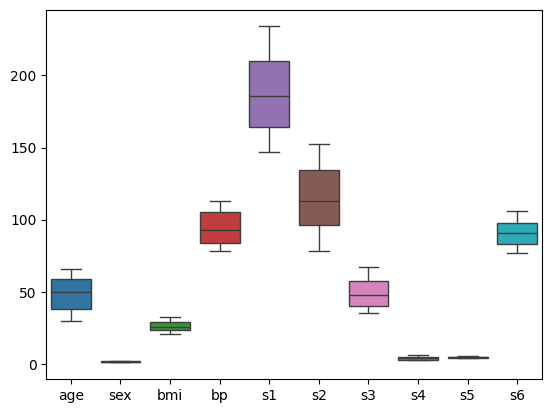

In [30]:
sns.boxplot(data_rep_outliers)

In [52]:
data_rep_outliers = data.copy()
for i in range(data.shape[1]):
    feature_data = data.iloc[:, i]
    q1  = np.percentile(feature_data, 25)
    q3  = np.percentile(feature_data, 75)
    iqr = (q3-q1)
    low = q1-(1.5*iqr)
    upp = q1-(1.5*iqr)
    data_rep_outliers.iloc[feature_data.index[feature_data < low], i] = low
    data_rep_outliers.iloc[feature_data.index[feature_data > upp], i] = upp
# print("Data with outliers replaced:\n", data_replaced_outliers)

In [51]:
data1=data.copy()
for i in range(data.shape[1]):
    feature_data=data1.iloc[:,i]
    q1  = np.percentile(feature_data, 25)
    q3  = np.percentile(feature_data, 75)
    iqr = (q3-q1)
    data1.iloc[:,i]=(feature_data-np.median(feature_data))/iqr#np.std(feature_data)#(np.max(feature_data)-np.min(feature_data))
data1    

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.433735,1.0,1.053498,0.380952,-0.637363,-0.514954,-0.571429,0.000,0.332755,-0.271186
1,-0.096386,0.0,-0.674897,-0.285714,-0.065934,-0.254876,1.257143,-0.500,-1.010756,-1.491525
2,1.060241,1.0,0.790123,0.000000,-0.659341,-0.504551,-0.400000,0.000,0.073213,-0.406780
3,-1.253012,0.0,-0.065844,-0.428571,0.263736,0.478544,-0.457143,0.500,0.375087,-0.135593
4,0.000000,0.0,-0.444444,0.380952,0.131868,0.322497,0.228571,0.000,-0.457391,-0.745763
...,...,...,...,...,...,...,...,...,...,...
437,0.481928,1.0,0.411523,0.904762,-0.021978,0.020806,-0.342857,0.000,0.504580,0.135593
438,-0.144578,1.0,-0.131687,-0.857143,0.857143,1.378414,-0.342857,0.500,-0.246149,0.745763
439,0.481928,1.0,-0.131687,0.317619,-0.527473,-0.166450,-0.285714,-0.115,-0.684178,0.271186
440,-0.674699,0.0,0.707819,0.095238,0.329670,0.317295,-0.342857,0.395,0.707634,-0.406780
